In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

import os
import glob

bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [3]:
path_img = 'D:/Concrete Cracks/5y9wdsg2zt-2/Concrete Crack Images for Classification/'

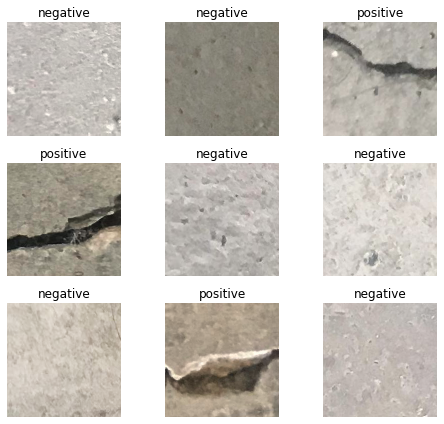

In [4]:
data = ImageDataBunch.from_folder(path_img, ds_tfms=get_transforms(), size=227)
data.show_batch(rows=3, figsize=(7,6))

In [8]:
print(data.classes)
len(data.classes),data.c

['negative', 'positive']


(2, 2)

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.031427,0.008647,0.003125,07:50
1,0.023535,0.009098,0.002625,07:31
2,0.013164,0.003313,0.001375,07:35
3,0.008167,0.002756,0.000875,07:42


In [11]:
learn.save('stage-1-concretecracks')

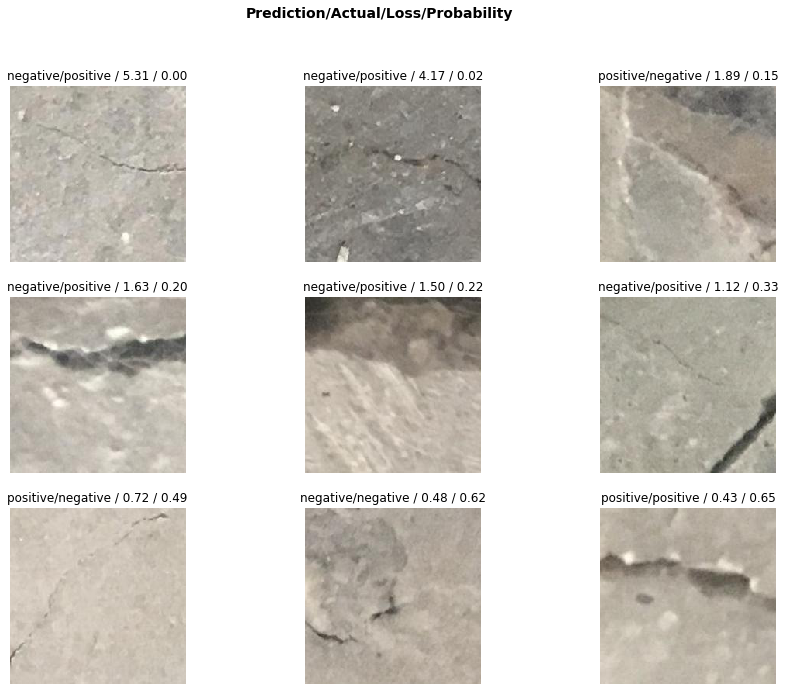

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,11))

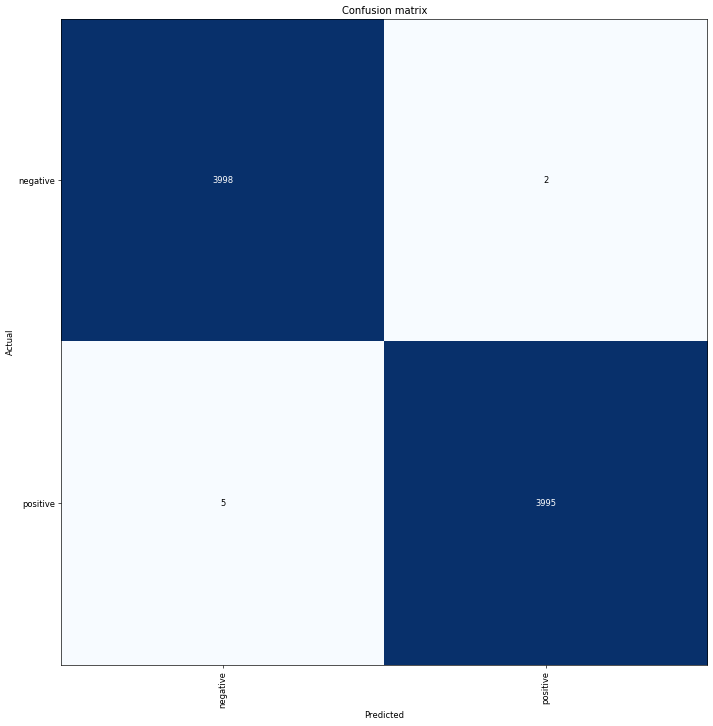

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)